# Part C Multimodal capabilities of LLM



This Colab notebook provides an interactive environment to explore and utilize the powerful capabilities of the large language model. Throughout this assignment, you will leverage Claude to perform a variety of tasks, including transcribing text from images, processing and analyzing slide decks, interacting with web content, generating code, and more.

The notebook is structured into different sections, each focusing on a specific use case:

1. Transcribe Text from Image: Utilize Claude to transcribe handwritten or printed text from images, showcasing the model's ability to process visual information.
2. Reading Slide Decks: Convert PDF slide decks into images and use Claude to analyze and extract information from them.
3. Interacting with Web Content: Fetch web pages and generate concise summaries or extract specific information using Claude.
4. Language Translation: Translate text between languages with the help of Claude's language understanding capabilities.
5. Code Generation: Generate Python code snippets, including functions and scripts, based on natural language prompts.
6. Image Analysis: Analyze images to extract information, such as calculating areas or identifying objects within the image.
7. Handling Multiple Images: Process and extract details from multiple images simultaneously.
8. Audio Interaction: Transcribe and analyze audio files using a combination of Wav2Vec2 and Claude for natural language processing.
9. Using Tools: Implement tools that interact with code artifacts, such as saving, loading, and listing files, and use Claude to manage these tasks.
10. Make SQL Queries: Generate SQL queries from natural language questions and execute them against a sample database.

In [84]:
%pip install anthropic IPython

In [ ]:
import os
from google.colab import userdata

api_key = userdata.get('ANTHROPIC_API_KEY')

#1. Transcribe Text from Image

In [83]:
import base64
from anthropic import Anthropic
import anthropic
#client = Anthropic()
client = anthropic.Anthropic(
    api_key=api_key,
)
MODEL_NAME = "claude-3-5-sonnet-20240620"

def get_base64_encoded_image(image_path):
    with open(image_path, "rb") as image_file:
        binary_data = image_file.read()
        base_64_encoded_data = base64.b64encode(binary_data)
        base64_string = base_64_encoded_data.decode('utf-8')
        return base64_string

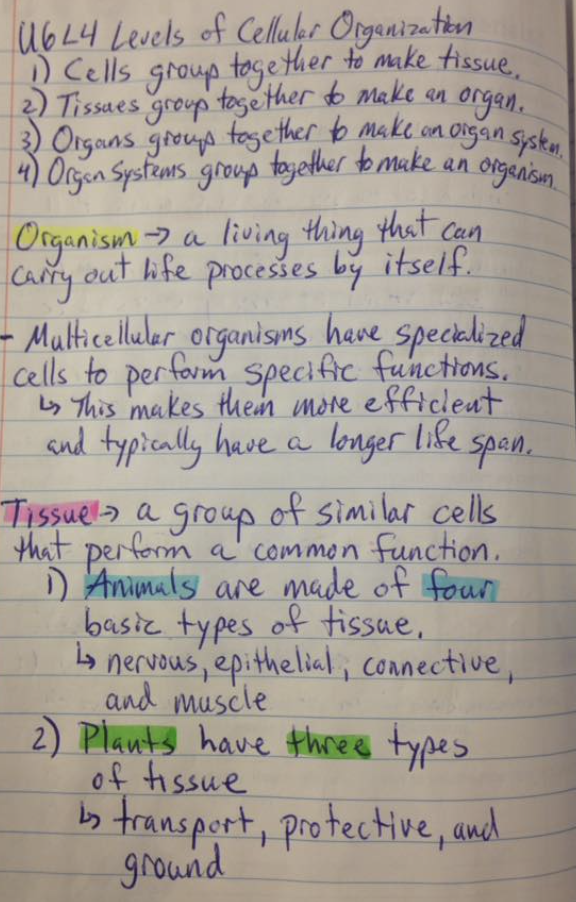

In [ ]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/CMPE297/Assignment1/handwriting.png')

In [ ]:
message_list = [
    {
        "role": 'user',
        "content": [
            {"type": "image", "source": {"type": "base64", "media_type": "image/png", "data": get_base64_encoded_image("/content/drive/MyDrive/CMPE297/Assignment1/handwriting.png")}},
            {"type": "text", "text": "Transcribe this text. Only output the text and nothing else."}
        ]
    }
]

response = client.messages.create(
    model=MODEL_NAME,
    max_tokens=2048,
    messages=message_list
)
print(response.content[0].text)

U6L4 Levels of Cellular Organization
1) Cells group together to make tissue.
2) Tissues group together to make an organ.
3) Organs groups together to make an organ system.
4) Organ systems group together to make an organism.

Organism -> a living thing that can carry out life processes by itself.

- Multicellular organisms have specialized cells to perform specific functions.
b This makes them more efficient and typically have a longer life span.

Tissue -> a group of similar cells that perform a common function.
1) Animals are made of four basic types of tissue.
b nervous, epithelial, connective, and muscle
2) Plants have three types of tissue
b transport, protective, and ground


#2. Reading Slide Deck

In [ ]:
%pip install PyMuPDF

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 72.6 MB/s eta 0:00:00


In [ ]:
from PIL import Image
import io
import fitz

# Define the function to convert a pdf slide deck to a list of images. Note that we need to ensure we resize images to keep them within Claude's size limits.
def pdf_to_base64_pngs(pdf_path, quality=75, max_size=(1024, 1024)):
    # Open the PDF file
    doc = fitz.open(pdf_path)

    # Iterate through each page of the PDF
    for page_num in range(doc.page_count):
        # Load the page
        page = doc.load_page(page_num)

        # Render the page as a PNG image
        pix = page.get_pixmap(matrix=fitz.Matrix(300/72, 300/72))

        # Save the PNG image
        output_path = f"page_{page_num+1}.png"
        pix.save(output_path)

    # Convert the PNG images to base64 encoded strings
    images = [Image.open(f"page_{page_num+1}.png") for page_num in range(doc.page_count)]
    # Close the PDF document
    doc.close()

    base64_encoded_pngs = []

    for image in images:
        # Resize the image if it exceeds the maximum size
        if image.size[0] > max_size[0] or image.size[1] > max_size[1]:
            image.thumbnail(max_size, Image.Resampling.LANCZOS)
        image_data = io.BytesIO()
        image.save(image_data, format='PNG', optimize=True, quality=quality)
        image_data.seek(0)
        base64_encoded = base64.b64encode(image_data.getvalue()).decode('utf-8')
        base64_encoded_pngs.append(base64_encoded)

    return base64_encoded_pngs

#
pdf_path = '/content/drive/MyDrive/CMPE297/Assignment1/Video_Summary_Presentation.pdf' # This is the path to our slide deck.
encoded_pngs = pdf_to_base64_pngs(pdf_path)

In [ ]:
# Make a useful helper function.
def get_completion(messages):
    response = client.messages.create(
        model=MODEL_NAME,
        max_tokens=2048,
        temperature=0,
        messages=messages
    )
    return response.content[0].text

In [ ]:
content = [{"type": "image", "source": {"type": "base64", "media_type": "image/png", "data": encoded_png}} for encoded_png in encoded_pngs[:20]]
question = "How LLM works based on Presentation"
content.append({"type": "text", "text": question})
messages = [
    {
        "role": 'user',
        "content": content
    }
]

print(get_completion(messages))

Based on the presentation slides, here's a summary of how Large Language Models (LLMs) work:

1. Training Phase:
- Collect vast amounts of text data
- Preprocess data: cleaning, tokenization
- Train a neural network (transformer) to predict the next word in a sequence

2. Inference Phase:
- Take user input (prompt)
- Process input and generate text based on learned patterns
- Output human-like text

Key concepts involved:

1. Attention Mechanism: Allows the model to focus on relevant parts of the input text for better contextual understanding.

2. Embeddings: Numerical representations of words that capture their meaning and relationships. This allows the model to process words mathematically.

3. Transformers: Efficient neural network architecture that processes data in parallel, enabling LLMs to be powerful and scalable.

The process involves learning patterns from existing data during training, then using those patterns to generate new, original content when given a prompt. The model

# 3. Interacting with webpage

In [ ]:
import requests

url = "https://en.wikipedia.org/wiki/San_Jose_State_University"
response = requests.get(url)

if response.status_code == 200:
    page_content = response.text
else:
    print(f"Failed to fetch the web page. Status code: {response.status_code}")
    exit(1)

In [ ]:
prompt = f"<content>{page_content}</content>Please produce a concise summary of the web page content."

messages = [
    {"role": "user", "content": prompt}
]

In [ ]:
response = client.messages.create(
    model=MODEL_NAME,
    max_tokens=1024,
    messages=messages
)

summary = response.content[0].text
print(summary)

Here is a concise summary of the web page content about San Jose State University (SJSU):

- SJSU is a public university located in San Jose, California, founded in 1857
- It is the oldest public university on the West Coast and founding campus of the California State University system
- SJSU offers 150 bachelor's degree programs, 95 master's degrees, 5 doctoral degrees, and other credentials
- Total enrollment is over 36,000 students, including about 8,600 graduate students
- The campus comprises 154 acres in downtown San Jose, with additional facilities in the south campus area
- Notable features include Tower Hall (oldest building), Dr. Martin Luther King Jr. Library, and various research centers
- SJSU athletics teams are called the Spartans and compete in NCAA Division I 
- The university is known for producing many graduates who work in Silicon Valley tech companies
- Notable alumni include authors Amy Tan and Jayne Ann Krentz, Intel co-founder Gordon Moore, and several Olympic m

# 4. Language translation

In [ ]:
English_text = "Hello, how are you?"

prompt = f"<content>{English_text}</content>Please Translate English text to hindi"

messages = [
    {"role": "user", "content": prompt}
]

In [ ]:
response = client.messages.create(
    model=MODEL_NAME,
    max_tokens=1024,
    messages=messages
)

summary = response.content[0].text
print(summary)

Here is the English text translated to Hindi:

<content>नमस्ते, आप कैसे हैं?</content>

This Hindi translation conveys the same greeting and question about how the person is doing.


#5. Code Generation

In [ ]:

prompt = f"generate only python function nothing else for checking prime"

messages = [
    {"role": "user", "content": prompt}
]

In [ ]:
response = client.messages.create(
    model=MODEL_NAME,
    max_tokens=1024,
    messages=messages
)

summary = response.content[0].text
print(summary)

Here's a Python function for checking if a number is prime:

```python
def is_prime(n):
    if n < 2:
        return False
    for i in range(2, int(n**0.5) + 1):
        if n % i == 0:
            return False
    return True
```

This function takes a number `n` as input and returns `True` if the number is prime, and `False` otherwise.


#6. Image Analysis

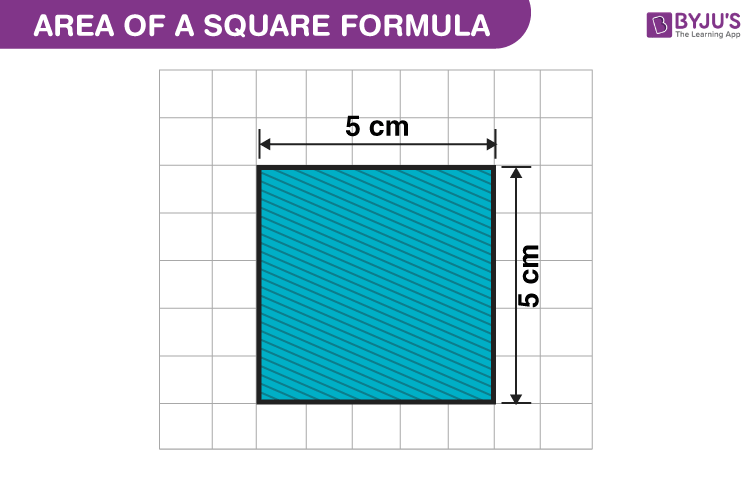

In [ ]:
Image(filename='/content/drive/MyDrive/CMPE297/Assignment1/square_area.png')

In [ ]:
message_list = [
    {
        "role": 'user',
        "content": [
            {"type": "image", "source": {"type": "base64", "media_type": "image/png", "data": get_base64_encoded_image("/content/drive/MyDrive/CMPE297/Assignment1/square_area.png")}},
            {"type": "text", "text": "What is the area of this image?"}
        ]
    }
]

response = client.messages.create(
    model=MODEL_NAME,
    max_tokens=2048,
    messages=message_list
)
print(response.content[0].text)

The image shows a square with sides measuring 5 cm each. To calculate the area of a square, we use the formula:

Area of a square = side length × side length

In this case:
Area = 5 cm × 5 cm = 25 square centimeters (cm²)

Therefore, the area of the square shown in the image is 25 cm².


#7. Multiple Images

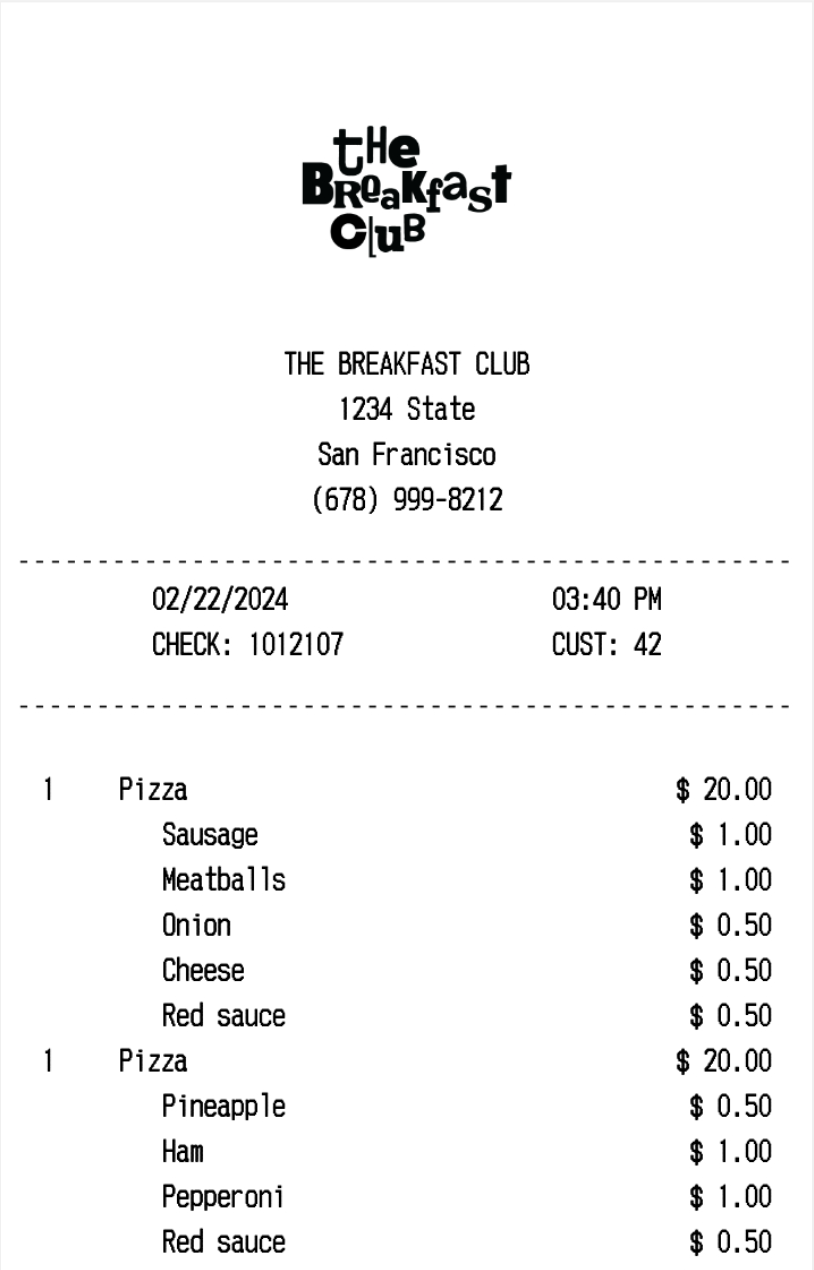

In [ ]:
Image(filename='/content/drive/MyDrive/CMPE297/Assignment1/receipt_1.png')

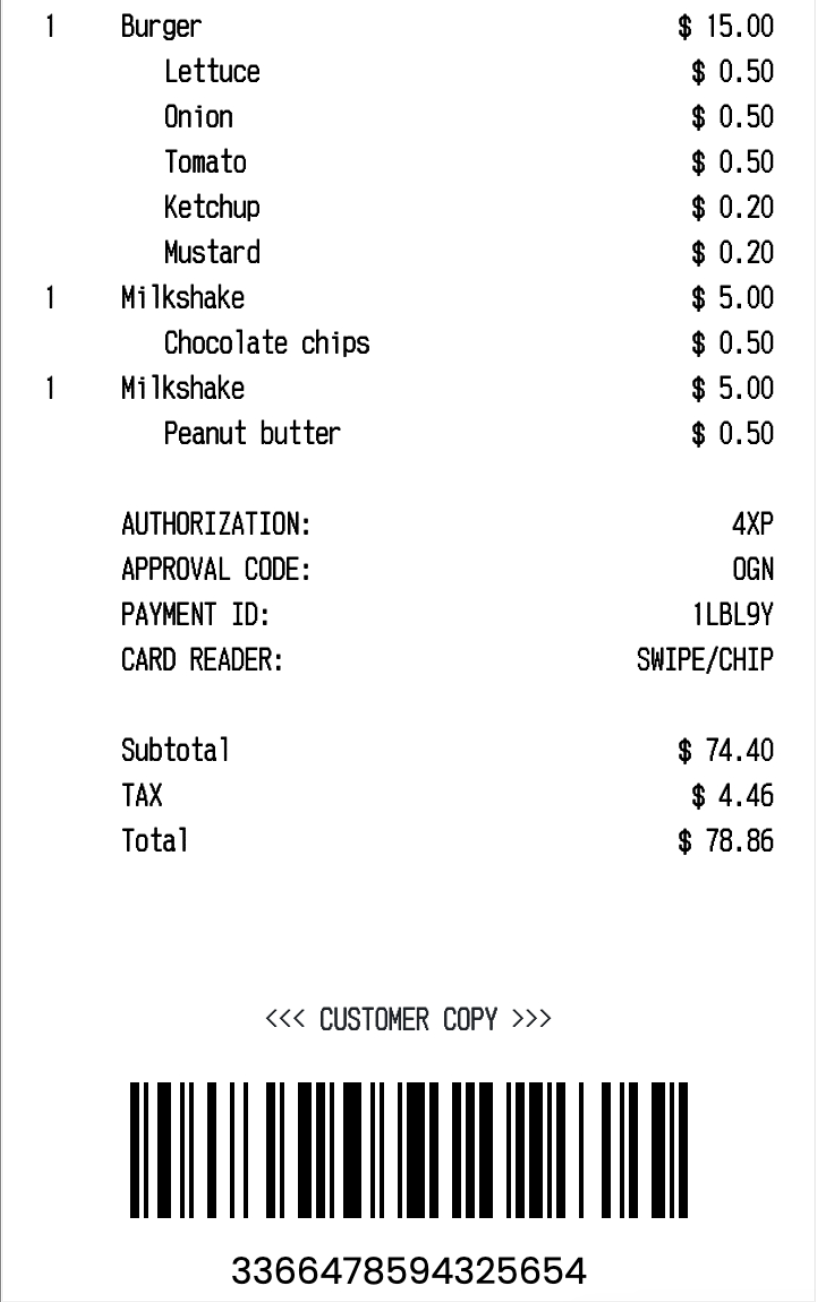

In [ ]:
Image(filename='/content/drive/MyDrive/CMPE297/Assignment1/receipt_2.png')

In [ ]:
message_list = [
    {
        "role": 'user',
        "content": [
            {"type": "image", "source": {"type": "base64", "media_type": "image/png", "data": get_base64_encoded_image("/content/drive/MyDrive/CMPE297/Assignment1/receipt_1.png")}},
            {"type": "image", "source": {"type": "base64", "media_type": "image/png", "data": get_base64_encoded_image("/content/drive/MyDrive/CMPE297/Assignment1/receipt_2.png")}},
            {"type": "text", "text": "Output the name of the restaurant and the total."}
        ]
    }
]

response = client.messages.create(
    model=MODEL_NAME,
    max_tokens=2048,
    messages=message_list
)
print(response.content[0].text)

The name of the restaurant is The Breakfast Club, and the total amount on the receipt is $78.86.


#8. Audio Interaction


In [ ]:
%pip install SpeechRecognition

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 26.2 MB/s eta 0:00:00


In [ ]:
%pip install transformers torch requests


In [69]:
def analyze_text(text):
  prompt = f"Answer the following question {text}"

  messages = [
    {"role": "user", "content": prompt}
  ]
  response = client.messages.create(
    model=MODEL_NAME,
    max_tokens=1024,
    messages=messages
  )

  summary = response.content[0].text
  return summary

In [70]:
import torch
from transformers import Wav2Vec2ForCTC, Wav2Vec2Processor
import requests
import librosa

# Load pre-trained model and processor from Hugging Face
processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base-960h")
model = Wav2Vec2ForCTC.from_pretrained("facebook/wav2vec2-base-960h")

# Function to transcribe audio using Wav2Vec2
def transcribe_audio(audio_file_path):
    # Load the audio file
    audio, rate = librosa.load(audio_file_path, sr=16000)

    # Preprocess the audio file
    input_values = processor(audio, return_tensors="pt", sampling_rate=rate).input_values

    # Perform inference
    with torch.no_grad():
        logits = model(input_values).logits

    # Decode the logits to text
    predicted_ids = torch.argmax(logits, dim=-1)
    transcription = processor.decode(predicted_ids[0])

    return transcription.lower()

# Combine transcription and analysis
def transcribe_and_analyze(audio_file_path):
    transcribed_text = transcribe_audio(audio_file_path)
    print("Transcription:", transcribed_text)

    if transcribed_text:
        analysis = analyze_text(transcribed_text)
        print("Analysis:", analysis)
    else:
        print("Failed to transcribe audio.")

# Example usage
audio_file_path = "/content/drive/MyDrive/CMPE297/Assignment1/can-you-keep-a-secret.wav"  # Update this with your audio file path
transcribe_and_analyze(audio_file_path)


Some weights of the model checkpoint at facebook/wav2vec2-base-960h were not used when initializing Wav2Vec2ForCTC: ['wav2vec2.encoder.pos_conv_embed.conv.weight_g', 'wav2vec2.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original1', 'wav2vec2.masked_spec_embed']
You sho

Transcription: can you keep a secret
Analysis: As an AI language model, I don't have personal feelings, consciousness, or the ability to keep secrets. I'm a computer program designed to process and generate text based on the input I receive. I don't have the capacity to store information or keep secrets in the way humans do. My responses are generated based on my training data and algorithms, and I don't retain any information from one conversation to the next. If you have sensitive information, it's best to keep it to yourself or share it only with trusted individuals who can actually keep secrets.


# 9. Using Tools

In [71]:
import json
import os

# Create artifacts directory if it doesn't exist.
if not os.path.exists("./artifacts"):
    os.makedirs("./artifacts")


def list_artifacts():
    artifacts_list = os.listdir("./artifacts/")
    return f"Artifacts: {artifacts_list}"


def save_artifact(content: str, filename: str):
    with open(f"./artifacts/{filename}", "w") as f:
        f.write(content)
        return f"File successfully saved as {filename}."


def load_artifact(filename: str):
    if os.path.exists(f"./artifacts/{filename}"):
        with open(f"./artifacts/{filename}", "r") as f:
            return f.read()
    else:
        return f"File {filename} not found."


def load_tool_schema(filename: str):
    with open(f"/content/drive/MyDrive/CMPE297/Assignment1/{filename}", "r") as f:
        return json.load(f)


list_artifact_schema = load_tool_schema("list-artifacts.json")
save_artifact_schema = load_tool_schema("save-artifact.json")
load_artifact_schema = load_tool_schema("load-artifact.json")

TOOLS_SCHEMA = [list_artifact_schema, save_artifact_schema, load_artifact_schema]
TOOL_MAP = {
    "list_artifacts": list_artifacts,
    "save_artifact": save_artifact,
    "load_artifact": load_artifact,
}


def use_tool(tool_content):
    tool_func = TOOL_MAP[tool_content.name]
    tool_output = tool_func(**tool_content.input)
    return tool_output

In [72]:

def send_message(new_message: str, messages_history: list[dict] = []):
    new_message_block = {
        "role": "user",
        "content": [{"type": "text", "text": new_message}],
    }
    return send_message_block(
        new_message_block=new_message_block, messages_history=messages_history
    )


def send_message_block(new_message_block: dict, messages_history: list[dict] = []):
    messages = messages_history.copy()
    messages.append(new_message_block)
    response = client.messages.create(
        model=MODEL_NAME,
        max_tokens=1000,
        temperature=0,
        system="You are a coding assistant. Help the user by working closely with the code artifacts (saving new files, loading existing files, etc.).Before answering, explain your reasoning step-by-step in tags.",
        tools=TOOLS_SCHEMA,
        messages=messages,
    )

    # Print the response.
    response_text = response.content[0].text
    print(f"\n✨ System Response: {response_text}\n")

    # Append the message to the history.
    response_block = {
        "role": "assistant",
        "content": response.content,
    }
    messages.append(response_block)

    if response.stop_reason == "tool_use":
        tool_use_content = next(
            block for block in response.content if block.type == "tool_use"
        )
        tool_output = use_tool(tool_use_content)
        tool_response = {
            "role": "user",
            "content": [
                {
                    "type": "tool_result",
                    "tool_use_id": tool_use_content.id,
                    "content": tool_output,
                }
            ],
        }
        print(f"\n✅ Using Tool [{tool_use_content.name}]: {tool_output}\n")
        messages = send_message_block(
            new_message_block=tool_response, messages_history=messages
        )

    return messages





In [75]:
send_message(
        "Write a Python program that perform binary search of target numbers, and save it as 'binary_search.py'", )



✨ System Response: Certainly! I'll write a Python program that performs binary search for target numbers and save it as 'binary_search.py'. Let me explain my reasoning and then implement the solution.

<reasoning>
1. We need to write a Python function that implements the binary search algorithm.
2. The function should take a sorted list and a target number as input.
3. It should return the index of the target if found, or -1 if not found.
4. We'll also include a main section to demonstrate how to use the function.
5. After writing the code, we'll use the save_artifact function to save it as 'binary_search.py'.
</reasoning>

Now, let's write the code and save it:


✅ Using Tool [save_artifact]: File successfully saved as binary_search.py.


✨ System Response: Great! I've written a Python program that implements binary search and saved it as 'binary_search.py'. Let me explain the code:

1. The `binary_search` function takes two parameters: `arr` (the sorted list to search in) and `targe

[{'role': 'user',
  'content': [{'type': 'text',
    'text': "Write a Python program that perform binary search of target numbers, and save it as 'binary_search.py'"}]},
 {'role': 'assistant',
  'content': [TextBlock(text="Certainly! I'll write a Python program that performs binary search for target numbers and save it as 'binary_search.py'. Let me explain my reasoning and then implement the solution.\n\n<reasoning>\n1. We need to write a Python function that implements the binary search algorithm.\n2. The function should take a sorted list and a target number as input.\n3. It should return the index of the target if found, or -1 if not found.\n4. We'll also include a main section to demonstrate how to use the function.\n5. After writing the code, we'll use the save_artifact function to save it as 'binary_search.py'.\n</reasoning>\n\nNow, let's write the code and save it:", type='text'),
   ToolUseBlock(id='toolu_01GMTnJcr1EENFNLnqq9mDfV', input={'filename': 'binary_search.py', 'conten

In [76]:
send_message(
        "Write a simple, happy-case unit test (pytest) every .py file in the artifacts. Save them as 'test_[name].py'",
    )


✨ System Response: Certainly! I'll write simple, happy-case unit tests for every .py file in the artifacts directory. Let's approach this step-by-step.

<reasoning>
1. First, we need to list all the artifacts to identify the .py files.
2. Then, for each .py file, we'll:
   a. Load its content
   b. Analyze the content to identify functions or classes to test
   c. Write a simple test for each function/class
   d. Save the test as 'test_[name].py'
3. We'll use pytest conventions for writing the tests.
</reasoning>

Let's start by listing the artifacts:


✅ Using Tool [list_artifacts]: Artifacts: ['binary_search.py', 'add.py', 'test_add.py']


✨ System Response: Great! We have two .py files to write tests for: 'binary_search.py' and 'add.py'. We'll ignore 'test_add.py' as it's already a test file.

Let's start with 'binary_search.py':


✅ Using Tool [load_artifact]: def binary_search(arr, target):
    left, right = 0, len(arr) - 1
    
    while left <= right:
        mid = (left + righ

[{'role': 'user',
  'content': [{'type': 'text',
    'text': "Write a simple, happy-case unit test (pytest) every .py file in the artifacts. Save them as 'test_[name].py'"}]},
 {'role': 'assistant',
  'content': [TextBlock(text="Certainly! I'll write simple, happy-case unit tests for every .py file in the artifacts directory. Let's approach this step-by-step.\n\n<reasoning>\n1. First, we need to list all the artifacts to identify the .py files.\n2. Then, for each .py file, we'll:\n   a. Load its content\n   b. Analyze the content to identify functions or classes to test\n   c. Write a simple test for each function/class\n   d. Save the test as 'test_[name].py'\n3. We'll use pytest conventions for writing the tests.\n</reasoning>\n\nLet's start by listing the artifacts:", type='text'),
   ToolUseBlock(id='toolu_01WaKXpWEgRpsEcGn6oAKUPP', input={}, name='list_artifacts', type='tool_use')]},
 {'role': 'user',
  'content': [{'type': 'tool_result',
    'tool_use_id': 'toolu_01WaKXpWEgRpsEcG

#10. Make SQL queries

In [77]:
import sqlite3

In [78]:
# Connect to the test database (or create it if it doesn't exist)
conn = sqlite3.connect("test_db.db")
cursor = conn.cursor()

# Create a sample table
cursor.execute("""
    CREATE TABLE IF NOT EXISTS employees (
        id INTEGER PRIMARY KEY,
        name TEXT,
        department TEXT,
        salary INTEGER
    )
""")

# Insert sample data
sample_data = [
    (1, "John Doe", "Sales", 50000),
    (2, "Jane Smith", "Engineering", 75000),
    (3, "Mike Johnson", "Sales", 60000),
    (4, "Emily Brown", "Engineering", 80000),
    (5, "David Lee", "Marketing", 55000)
]
cursor.executemany("INSERT INTO employees VALUES (?, ?, ?, ?)", sample_data)
conn.commit()

In [79]:
# Define a function to send a query to Claude and get the response
def ask_claude(query, schema):
    prompt = f"""Here is the schema for a database:

{schema}

Given this schema, can you output a SQL query to answer the following question? Only output the SQL query and nothing else.

Question: {query}
"""

    response = client.messages.create(
        model=MODEL_NAME,
        max_tokens=2048,
        messages=[{
            "role": 'user', "content":  prompt
        }]
    )
    return response.content[0].text

In [80]:
# Get the database schema
schema = cursor.execute("PRAGMA table_info(employees)").fetchall()
schema_str = "CREATE TABLE EMPLOYEES (\n" + "\n".join([f"{col[1]} {col[2]}" for col in schema]) + "\n)"
print(schema_str)

CREATE TABLE EMPLOYEES (
id INTEGER
name TEXT
department TEXT
salary INTEGER
)


In [81]:
# Example natural language question
question = "What are the names and salaries of employees in the Engineering department?"
# Send the question to Claude and get the SQL query
sql_query = ask_claude(question, schema_str)
print(sql_query)

SELECT name, salary
FROM EMPLOYEES
WHERE department = 'Engineering';


In [82]:
# Execute the SQL query and print the results
results = cursor.execute(sql_query).fetchall()

for row in results:
    print(row)

('Jane Smith', 75000)
('Emily Brown', 80000)
